In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

/Users/chenzewei/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


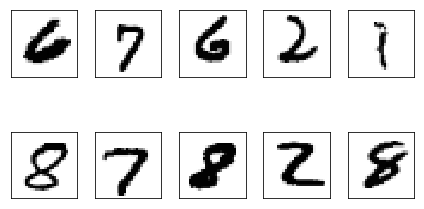

In [9]:
#显示图片输出
sout = mnist.train.images[0:10]
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
 
ax = ax.flatten()
for i in range(10):
    img = sout[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
 
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
# 参数
#学习率，迭代次数，batch大小
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# 网络参数
n_hidden_1 = 256 # 第一层的特征数（神经元数）
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST 输入
n_classes = 10 # MNIST 类别数(0-9)

# tf 图的输入
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [6]:
# 创建多层感知机模型
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# 权重、偏置参数
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [7]:
# 创建模型
pred = multilayer_perceptron(x, weights, biases)

# 定义 loss 和 optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#初始化变量
init = tf.global_variables_initializer()

Epoch: 0001 cost= 144.013509924
Epoch: 0002 cost= 39.483871796
Epoch: 0003 cost= 24.321997141
Epoch: 0004 cost= 16.958500393
Epoch: 0005 cost= 12.436871061
Epoch: 0006 cost= 9.188892323
Epoch: 0007 cost= 6.940806800
Epoch: 0008 cost= 5.257318208
Epoch: 0009 cost= 3.872059118
Epoch: 0010 cost= 2.965470532
Epoch: 0011 cost= 2.223095768
Epoch: 0012 cost= 1.673672273
Epoch: 0013 cost= 1.255177115
Epoch: 0014 cost= 1.031008706
Epoch: 0015 cost= 0.759236942
Optimization Finished!
Accuracy: 0.9465


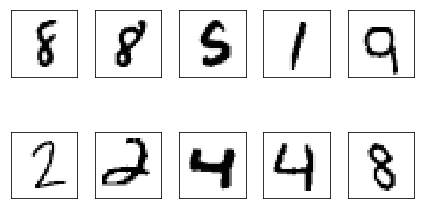

[8 8 5 1 9 2 2 4 4 8]


In [10]:
with tf.Session() as sess:
    sess.run(init)

    # 迭代次数
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # 计算平均误差
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print( "Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    
 
   #获取随机图片
    import random
    index = list(range(1,len(mnist.test.images)))
    random.shuffle(index)
    index = index[0:10]
    inp = [mnist.test.images[i] for i in index]
    #显示图片
    fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
 
    ax = ax.flatten()
    for i in range(10):
        img = inp[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')

    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    #预测输出
    feed_dict = {x:inp}
    model_pred = tf.argmax(pred,1)
    classification = sess.run(model_pred,feed_dict)
    print(classification)